In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import glob
import cv2
import pickle


In [37]:
from keras.models import Sequential, Model
from keras.layers import Conv2D
import os
from keras.applications.vgg16 import VGG16

In [38]:
print(os.listdir("patches/"))

['train_masks', '.ipynb_checkpoints', 'train_images']


In [39]:
#Capture training image info as a list
train_images = []

In [40]:
num_images_to_read = 100
counter = 0
for directory_path in glob.glob("patches/train_images/"):
    for img_path in sorted(glob.glob(os.path.join(directory_path, "*.tif"))):
        if counter>=num_images_to_read:
            break
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        print(img.shape)
        train_images.append(img)
        counter += 1

patches/train_images/image_0_00.tif
(224, 224, 3)
patches/train_images/image_0_01.tif
(224, 224, 3)
patches/train_images/image_0_02.tif
(224, 224, 3)
patches/train_images/image_0_03.tif
(224, 224, 3)
patches/train_images/image_0_04.tif
(224, 224, 3)
patches/train_images/image_0_05.tif
(224, 224, 3)
patches/train_images/image_0_06.tif
(224, 224, 3)
patches/train_images/image_0_07.tif
(224, 224, 3)
patches/train_images/image_0_08.tif
(224, 224, 3)
patches/train_images/image_0_10.tif
(224, 224, 3)
patches/train_images/image_0_11.tif
(224, 224, 3)
patches/train_images/image_0_12.tif
(224, 224, 3)
patches/train_images/image_0_13.tif
(224, 224, 3)
patches/train_images/image_0_14.tif
(224, 224, 3)
patches/train_images/image_0_20.tif
(224, 224, 3)
patches/train_images/image_0_21.tif
(224, 224, 3)
patches/train_images/image_0_22.tif
(224, 224, 3)
patches/train_images/image_0_23.tif
(224, 224, 3)
patches/train_images/image_0_24.tif
(224, 224, 3)
patches/train_images/image_0_30.tif
(224, 224, 3)


In [41]:
#Convert list to array for machine learning processing        
train_images = np.array(train_images)

In [42]:
num_images_to_read = 100
counter = 0
train_masks = [] 
for directory_path in glob.glob("patches/train_masks/"):
    for mask_path in sorted(glob.glob(os.path.join(directory_path, "*.tif"))):
        if counter>=num_images_to_read:
            break
        print(mask_path)
        mask = cv2.imread(mask_path, 0)
        mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        print(mask.shape)
        mask=mask/255.
        mask = mask.astype(np.uint8)
        train_masks.append(mask)
        #train_labels.append(label)
        counter += 1

patches/train_masks/image_0_00.tif
(224, 224)
patches/train_masks/image_0_01.tif
(224, 224)
patches/train_masks/image_0_02.tif
(224, 224)
patches/train_masks/image_0_03.tif
(224, 224)
patches/train_masks/image_0_04.tif
(224, 224)
patches/train_masks/image_0_05.tif
(224, 224)
patches/train_masks/image_0_06.tif
(224, 224)
patches/train_masks/image_0_07.tif
(224, 224)
patches/train_masks/image_0_08.tif
(224, 224)
patches/train_masks/image_0_10.tif
(224, 224)
patches/train_masks/image_0_11.tif
(224, 224)
patches/train_masks/image_0_12.tif
(224, 224)
patches/train_masks/image_0_13.tif
(224, 224)
patches/train_masks/image_0_14.tif
(224, 224)
patches/train_masks/image_0_20.tif
(224, 224)
patches/train_masks/image_0_21.tif
(224, 224)
patches/train_masks/image_0_22.tif
(224, 224)
patches/train_masks/image_0_23.tif
(224, 224)
patches/train_masks/image_0_24.tif
(224, 224)
patches/train_masks/image_0_30.tif
(224, 224)
patches/train_masks/image_0_31.tif
(224, 224)
patches/train_masks/image_0_32.tif

In [43]:
#Convert list to array for machine learning processing          
train_masks = np.array(train_masks)

In [44]:
#Use customary x_train and y_train variables
X_train = train_images
y_train = train_masks
y_train = np.expand_dims(y_train, axis=3)

In [45]:
X_train.shape, y_train.shape

((100, 224, 224, 3), (100, 224, 224, 1))

In [46]:
#Load VGG16 model wothout classifier/fully connected layers

In [47]:
#Load imagenet weights that we are going to use as feature generators
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [48]:
#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
    layer.trainable = False

In [49]:
VGG_model.summary()  #Trainable parameters will be 0

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [50]:
#After the first 2 convolutional layers the image dimension changes. 
#So for easy comparison to Y (labels) let us only take first 2 conv layers
#and create a new model to extract features

In [51]:
#New model with only first 2 conv layers
new_model = Model(inputs=VGG_model.input, outputs=VGG_model.get_layer('block1_conv2').output)
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
Total params: 38,720
Trainable params: 0
Non-trainable params: 38,720
_________________________________________________________________


In [52]:
#Now, let us apply feature extractor to our training data
features=new_model.predict(X_train)
features.shape

(100, 224, 224, 64)

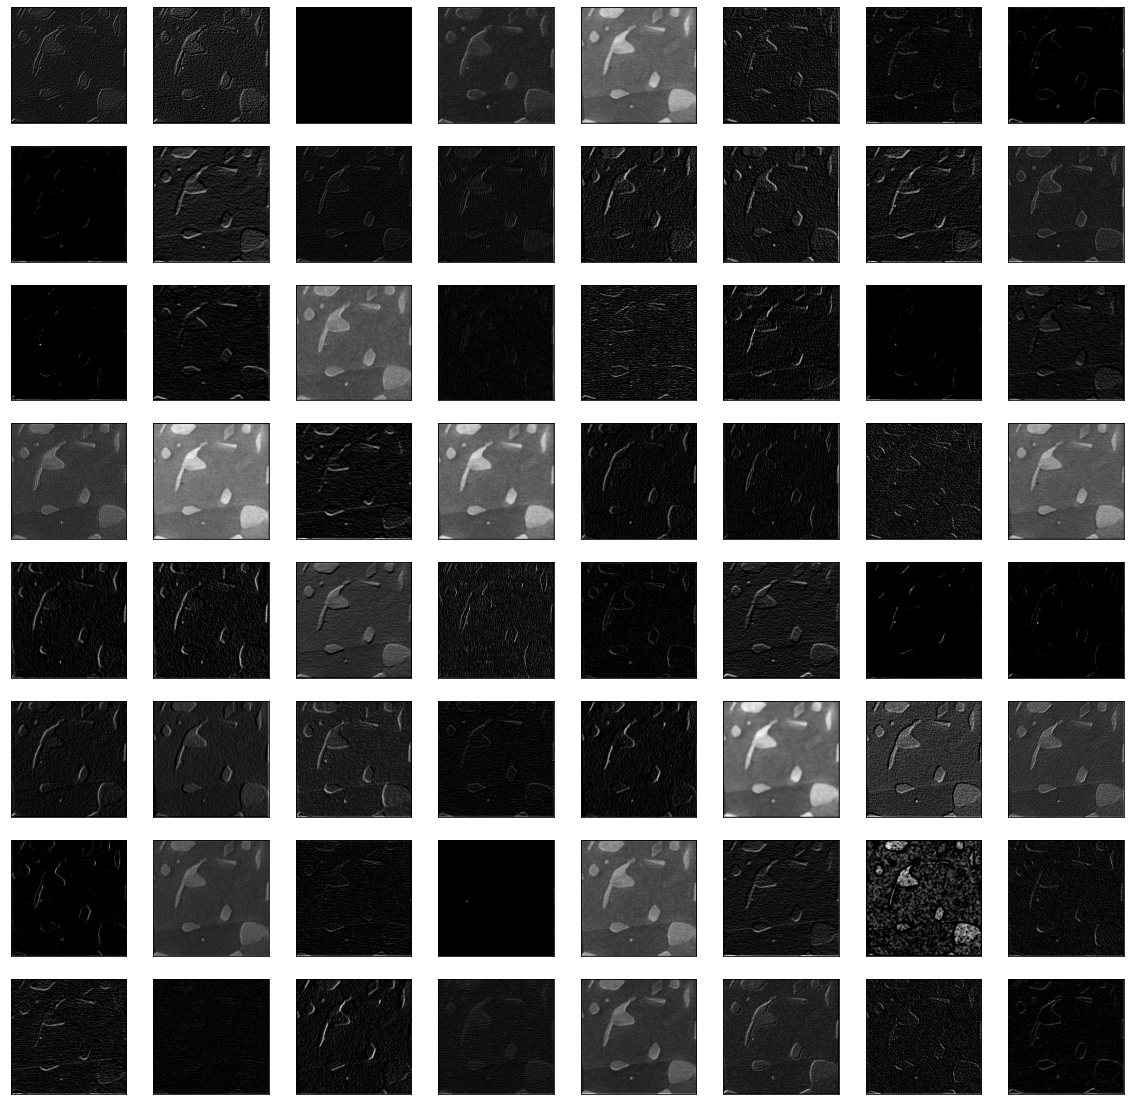

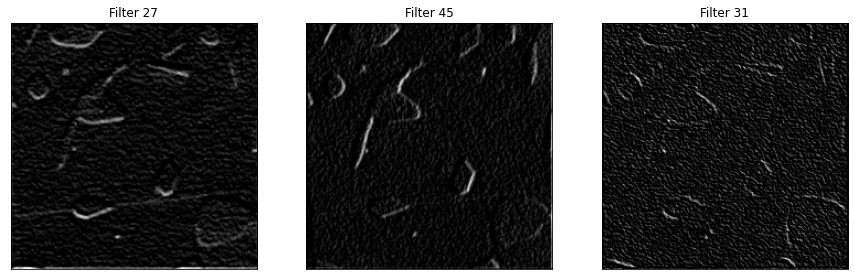

In [53]:
import matplotlib.pyplot as plt

# Make the figure bigger
plt.figure(figsize=(20, 20))

# To plot all filters in an 8x8 grid
square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(features[0, :, :, ix-1], cmap='gray')
        ix += 1
plt.savefig('images/64_filters.png')  # Save the figure
plt.show()

# To visualize filters 27, 32, 33
specific_filters = [27, 45, 31]
plt.figure(figsize=(15, 5))
for i, filter_index in enumerate(specific_filters):
    plt.subplot(1, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(features[0, :, :, filter_index-1], cmap='gray')
    plt.title(f"Filter {filter_index}")
    plt.savefig('images/specific_filters.png')  # Save the figure
plt.show()


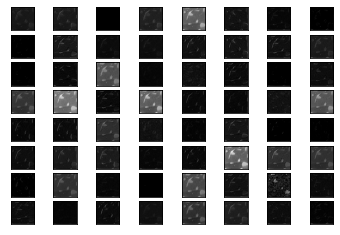

In [54]:
#Plot features to view them
square = 8
ix=1
for _ in range(square):
    for _ in range(square):
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(features[0,:,:,ix-1], cmap='gray')
        ix +=1
plt.show()

In [55]:
#Reassign 'features' as X to make it easy to follow
X=features
print(X.shape)
print(X.shape[3])
X = X.reshape(-1, X.shape[3])  #Make it compatible for Random Forest and match Y labels

(100, 224, 224, 64)
64


In [56]:
X.shape

(5017600, 64)

In [57]:
#Reshape Y to match X
Y = y_train.reshape(-1)


In [58]:
Y.shape

(5017600,)

In [59]:
#Combine X and Y into a dataframe to make it easy to drop all rows with Y values 0
#In our labels Y values 0 = unlabeled pixels. 
dataset = pd.DataFrame(X)
dataset['Label'] = Y #add Y to our dataframe
print(dataset['Label'].unique())
print(dataset['Label'].value_counts())

[0 1]
0    4354809
1     662791
Name: Label, dtype: int64


In [60]:
##If we do not want to include pixels with value 0 
##e.g. Sometimes unlabeled pixels may be given a value 0.
#dataset = dataset[dataset['Label'] != 0]

In [61]:
# Redefine X and Y for Random Forest
X_for_RF = dataset.drop(labels = ['Label'], axis=1)
Y_for_RF = dataset['Label']

In [62]:
print(X_for_RF.shape)
print(Y_for_RF.shape)

(5017600, 64)
(5017600,)


In [63]:
##Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_for_RF, Y_for_RF, test_size=0.2, random_state=20)

In [ ]:
########get fetue importances from already trained model######

In [64]:
from joblib import load
model = load('models/RF1_transferlearning_model.sav')

In [29]:
# Assuming `model` is your trained Random Forest model
feature_importances = model.feature_importances_

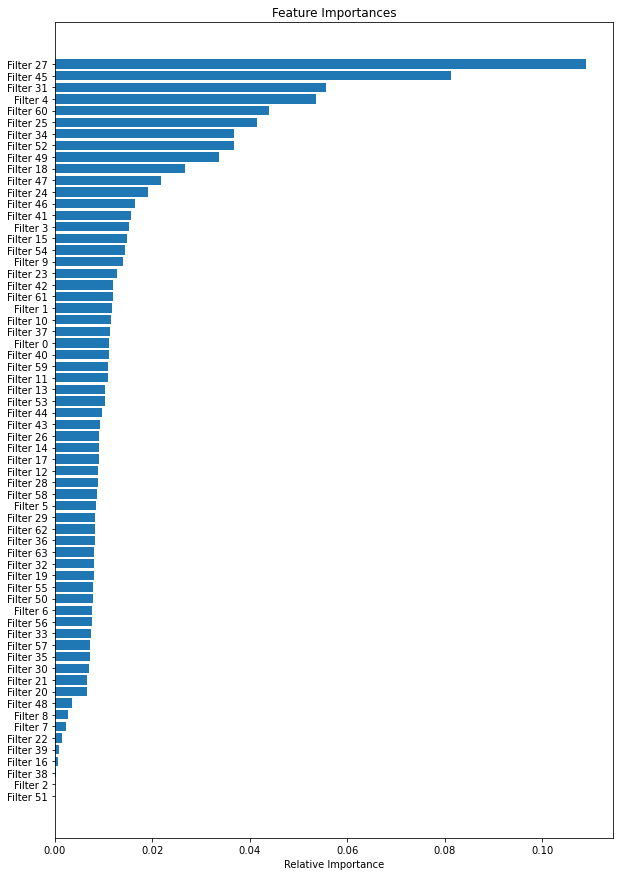

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming feature_importances are loaded from the model
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [f'Filter {i}' for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('images/feature_importances.png') 
plt.show()


In [27]:
# X_for_training = dataset.drop(labels = ['Label'], axis=1)
# X_for_training=X_for_training.values
# Y_for_training = dataset['Label']
# Y_for_training = dataset['Label']

In [28]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20, random_state = 42)

In [29]:
#fit(train)  the model on our training dataset
import time
start_time = time.time()
model.fit(X_train, y_train) 
end_time=time.time()
execution_time = end_time - start_time
print('execution time : ', execution_time/60, 'minutes')


execution time :  4.057358686129252 minutes


In [30]:
# STEP : Accuracy check
from sklearn import metrics
prediction_test = model.predict(X_test)
##Check accuracy on test dataset. 
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))


Accuracy =  0.9502849968112245


In [31]:
# #XGBOOST
# import xgboost as xgb
# model = xgb.XGBClassifier()


In [32]:
# # Train the model on training data
# model.fit(X_for_training, Y_for_training)          

In [33]:
#Save model for future use
filename = 'RF2_transferlearning_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [34]:
# filename = 'XGBoost_transferlearning_model_224_modified.sav'
# pickle.dump(model, open(filename, 'wb'))

In [35]:
#Load model.... 
loaded_model = pickle.load(open(filename, 'rb'))


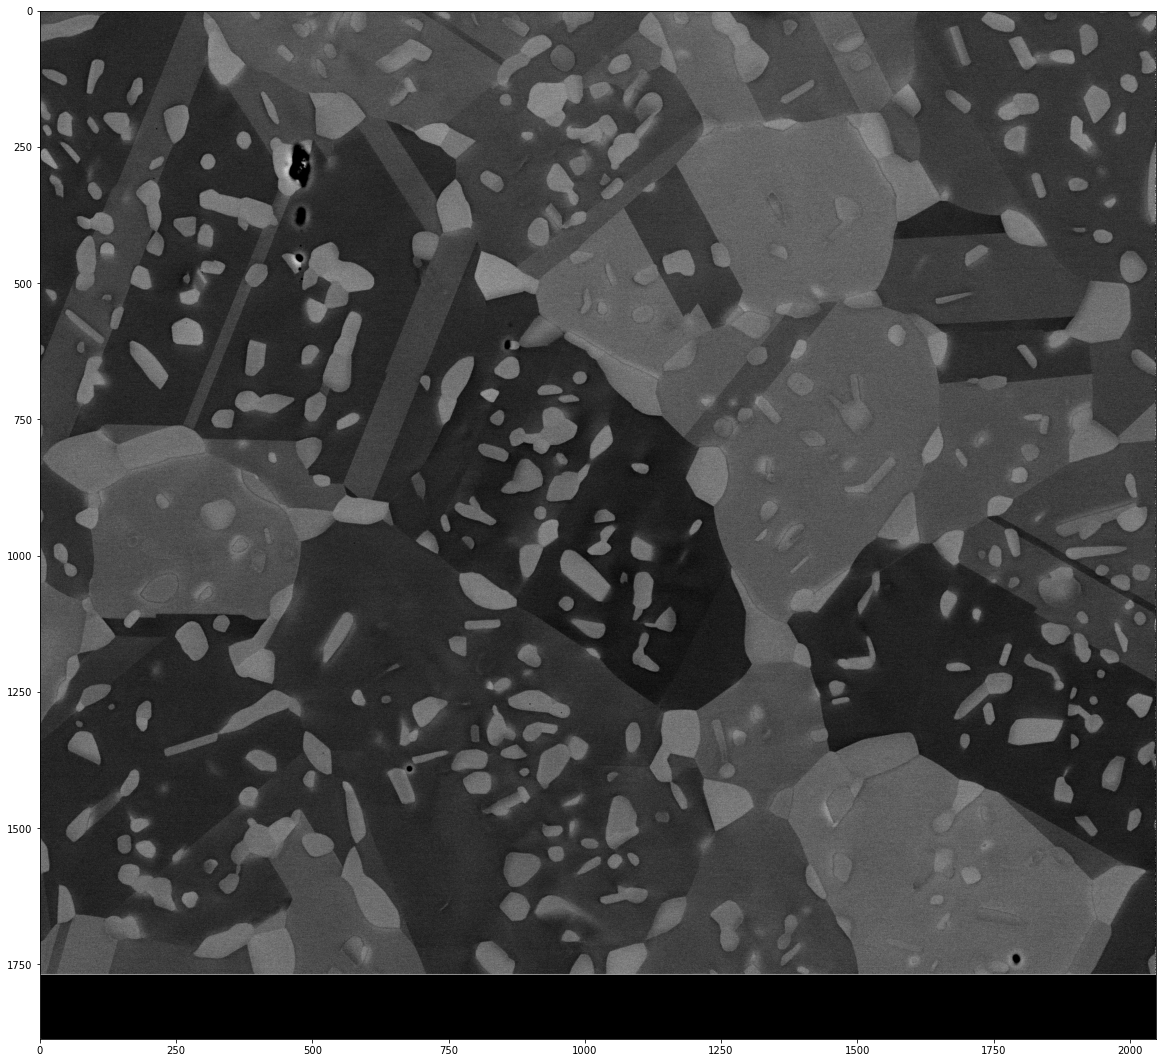

In [3]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('images/test_images/0900C_500h_area1.tif', cv2.IMREAD_COLOR)

test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
#test_img = np.expand_dims(test_img, axis=0)
fig = plt.figure(figsize=(20, 20))
plt.imshow(test_img, cmap='gray')
#print(test_img.shape)

In [37]:
test_img.shape

(1, 1887, 2048, 3)

In [38]:
#predict_image = np.expand_dims(X_train[8,:,:,:], axis=0)
#Extract fetures for test image using vgg16
X_test_feature = new_model.predict(test_img)


In [39]:
X_test_feature.shape

(1, 1887, 2048, 64)

In [40]:
X_test_feature = X_test_feature.reshape(-1, X_test_feature.shape[3])

In [41]:
X_test_feature.shape

(3864576, 64)

In [42]:
#Predict segmented image using our Random forest model
prediction = loaded_model.predict(X_test_feature)

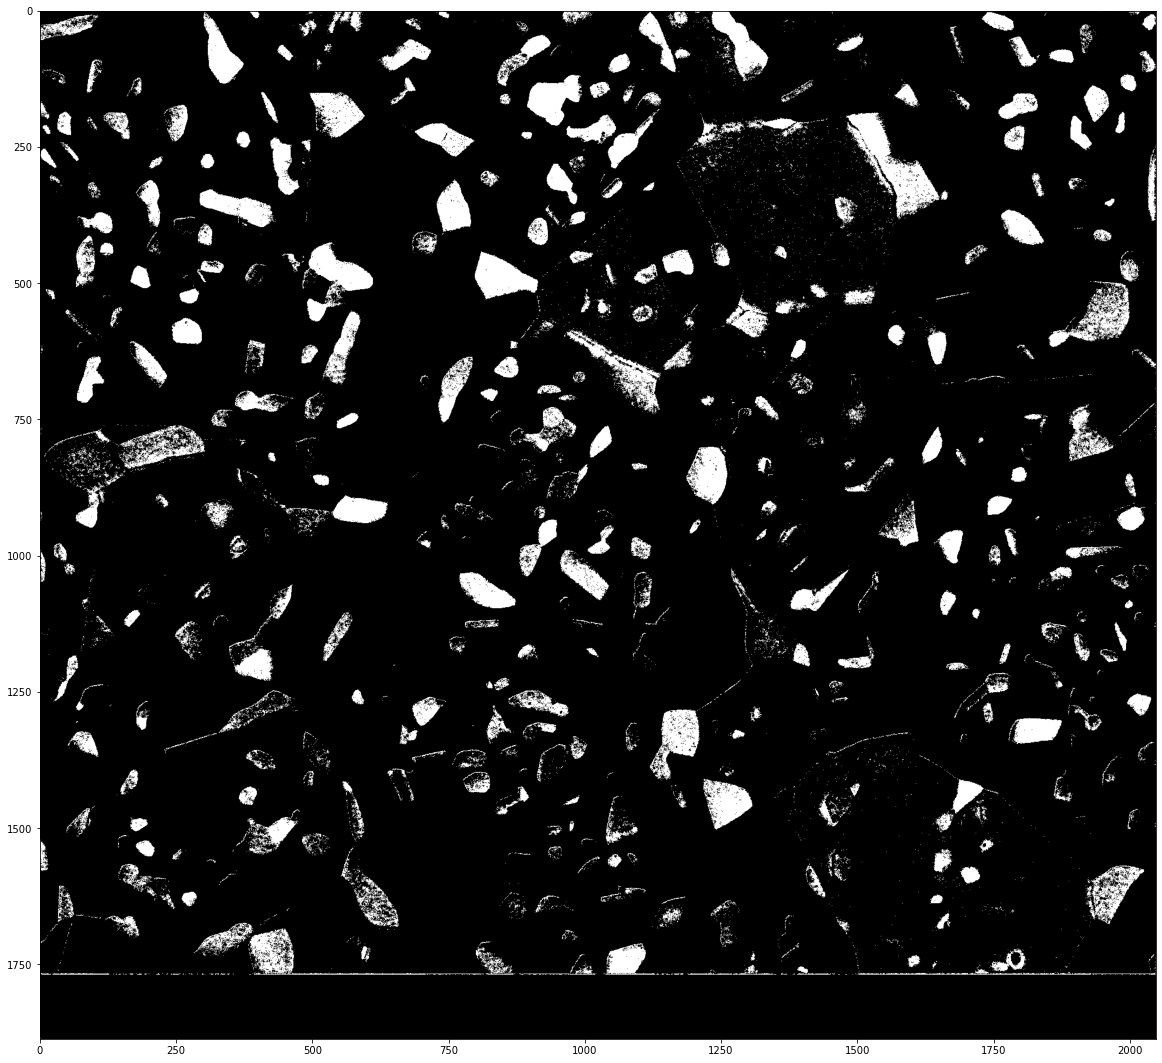

In [43]:
#View and Save segmented image
prediction_image = prediction.reshape(1887,2048)
fig = plt.figure(figsize=(20, 20))
plt.imshow(prediction_image, cmap='gray')

In [44]:
plt.imsave('images/test_images/RF2_0900C_500h_area1.jpg', prediction_image, cmap='gray')